# Grouping Similar Text

In [1]:
# Reading the dataset
from keras.datasets import imdb
(x_trg, y_trg), (x_test, y_test) = imdb.load_data()

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\vinaykumar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\vinaykumar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nd

In [2]:
# Converting sequences
from keras.preprocessing import sequence

x_trg = sequence.pad_sequences(x_trg, maxlen = 200)
x_test = sequence.pad_sequences(x_test, maxlen = 200)

In [3]:
# Importing the necessary packages
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
# Determine the optimum value of k using Elbow method
list1 = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(x_trg)
    list1.append(kmeans.inertia_)   # inertia = WCSS

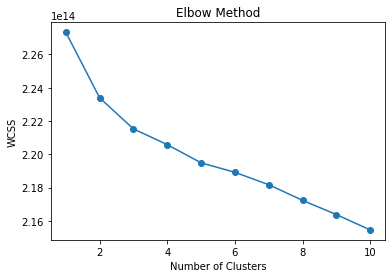

In [5]:
# Creating a plot
plt.plot(range(1,11), list1, marker = "o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [6]:
# Doing k-mean clustering for optimum value of k = 2
kmeans = KMeans(n_clusters = 2, max_iter = 100, random_state = 42).fit(x_trg)

In [7]:
# Display number of movies in each cluster
print("Number of movies in each cluster: \n", Counter(kmeans.labels_))

Number of movies in each cluster: 
 Counter({0: 17833, 1: 7167})


In [8]:
# Creating confusion matrix and determining accuracy of the model
import pandas as pd

y_kmeans = kmeans.fit_predict(x_test)
data = {"Original" : y_trg, "Predicted" : y_kmeans}

kmeansdf = pd.DataFrame(data, columns = ["Original", "Predicted"])

In [9]:
kmeansdf

,Original,Predicted
0,1,0
1,0,0
2,0,1
3,1,0
4,0,0
...,...,...
24995,1,0
24996,0,0
24997,0,0
24998,1,0


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [12]:
score = accuracy_score(kmeansdf["Predicted"], kmeansdf["Original"])
print("Accuracy score of the model is: ", score)
print("\n")
results = confusion_matrix(kmeansdf["Original"], kmeansdf["Predicted"])
print("Confusion Matrix of the model is: \n", results)

Accuracy score of the model is:  0.5016


Confusion Matrix of the model is: 
 [[8485 4015]
 [8445 4055]]
